In [1]:
#Introduction & Objectif
"""
Dataset: Wine Quality (Red Wine)
Source: UCI Machine Learning Repository
Description: Données physico-chimiques du vin et note de qualité
"""

In [2]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#3. Chargement des données
df = pd.read_csv("C:\\Users\\Admin\\winequality-red.csv", sep=';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#4. Compréhension du dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#5. Nettoyage des données
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates()

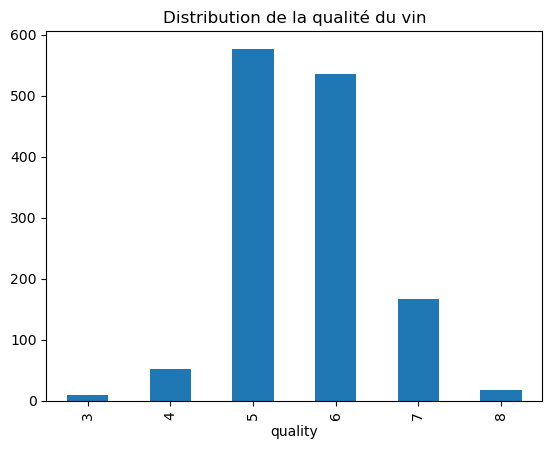

In [7]:
#6. Analyse univariée
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution de la qualité du vin")
plt.show()

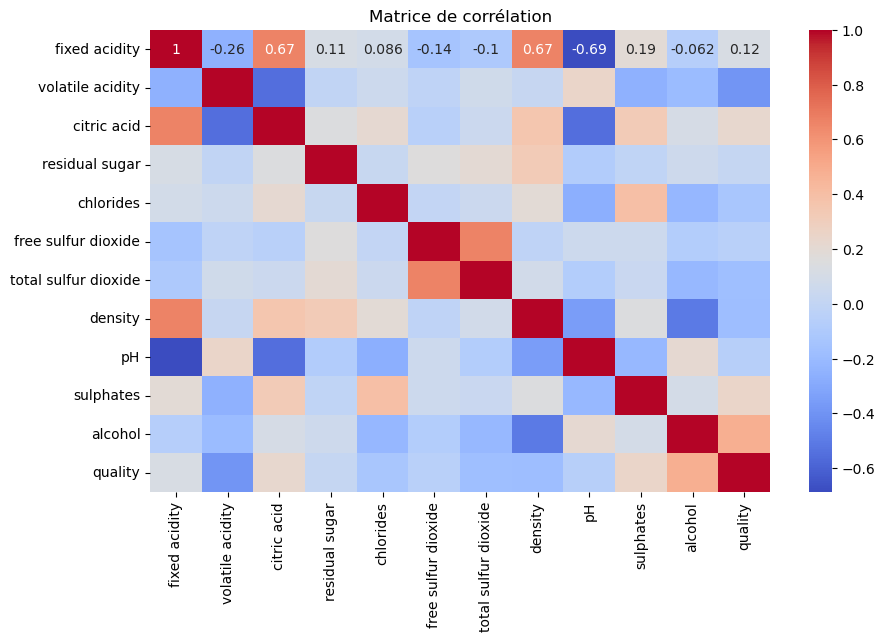

In [8]:
# Corrélations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

In [ ]:
#Corrélations fortes et significatives
"- Alcool vs Qualité : Forte corrélation positive → plus le taux d’alcool est élevé, meilleure est la qualité perçue du vin.
- Volatile Acidity vs Qualité : Corrélation négative → une acidité volatile élevée tend à diminuer la qualité du vin.
- Citric Acid vs Volatile Acidity : Corrélation négative → les vins avec plus d’acide citrique ont souvent moins d’acidité volatile, ce qui peut être bénéfique.

Corrélations faibles ou neutres
- Residual Sugar vs Quality : Corrélation très faible → le sucre résiduel n’a pas d’impact direct sur la qualité.
- Density vs Quality : Corrélation négative modérée → une densité plus élevée est souvent associée à une qualité moindre.

Interactions chimiques intéressantes
- Free Sulfur Dioxide vs Total Sulfur Dioxide : Corrélation très forte → logique, car le soufre libre est une composante du soufre total.
- Fixed Acidity vs Citric Acid : Corrélation positive → ces deux types d’acidité évoluent souvent ensemble.

Conclusion générale
La qualité du vin semble principalement influencée par l’alcool, l’acidité volatile et la densité. Ces variables pourraient être des bonnes candidates pour la sélection de features dans un modèle de machine learning.
D’autres variables comme le sucre résiduel ou les chlorures ont peu d’impact direct sur la qualité.

In [9]:
# Sélection des variables pertinentes
features = ['alcohol', 'volatile acidity', 'density', 'sulphates', 'citric acid']
X = df[features]
y = df['quality']

In [10]:
# Découpage en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Modèle Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [12]:
# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [28]:
# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_proba))
print("\nRapport de classification:\n", classification_report(y_test, y_pred))

Accuracy: 0.5955882352941176
Log Loss: 1.2939043322039903

Rapport de classification:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.68      0.74      0.71       120
           6       0.52      0.62      0.57       103
           7       0.50      0.29      0.37        31
           8       0.00      0.00      0.00         3

    accuracy                           0.60       272
   macro avg       0.28      0.28      0.27       272
weighted avg       0.56      0.60      0.57       272



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss, classification_report

df = pd.read_csv("C:\\Users\\Admin\\winequality-red.csv", sep=';')

# Sélection des variables pertinentes
features = ['alcohol', 'volatile acidity', 'density', 'sulphates', 'citric acid']
X = df[features]
y = df['quality']

# Découpage en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 1. Logistic Regression
# -------------------------------
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Log Loss:", log_loss(y_test, y_proba_lr))
print("\nRapport de classification:\n", classification_report(y_test, y_pred_lr))

# -------------------------------
# 2. Support Vector Classifier (SVC)
# -------------------------------
svc = SVC(probability=True, kernel='rbf', C=1, gamma='scale')
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
y_proba_svc = svc.predict_proba(X_test)

print("\n=== Support Vector Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Log Loss:", log_loss(y_test, y_proba_svc))
print("\nRapport de classification:\n", classification_report(y_test, y_pred_svc))

=== Logistic Regression ===
Accuracy: 0.5625
Log Loss: 0.970391285582845

Rapport de classification:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.81      0.69       130
           6       0.54      0.53      0.54       132
           7       0.33      0.12      0.18        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.25      0.24      0.23       320
weighted avg       0.51      0.56      0.52       320



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



=== Support Vector Classifier ===
Accuracy: 0.55625
Log Loss: 1.049304502808349

Rapport de classification:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.82      0.69       130
           6       0.51      0.55      0.53       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.18      0.23      0.20       320
weighted avg       0.45      0.56      0.50       320



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Comparaison rapide des modèles
On voit que Random Forest est meilleur en précision brute, mais Logistic Regression/SVC donnent des probabilités plus stables (meilleur Log Loss).
Le Random Forest est retenu comme modèle final car il offre la meilleure précision globale tout en restant stable.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

# Charger les données
df = pd.read_csv("C:\\Users\\Admin\\winequality-red.csv", sep=';')

# Sélection des variables pertinentes
features = ['alcohol', 'volatile acidity', 'density', 'sulphates', 'citric acid']
X = df[features]
y = df['quality']

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à comparer
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "SVC": SVC(probability=True, kernel='rbf', C=1, gamma='scale'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = []

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    ll = log_loss(y_test, y_proba)
    
    results.append({"Modèle": name, "Accuracy": acc, "Log Loss": ll})

# Résultats sous forme de tableau
results_df = pd.DataFrame(results)
print(results_df)

                Modèle  Accuracy  Log Loss
0        Random Forest  0.634375  0.993549
1  Logistic Regression  0.562500  0.970391
2                  SVC  0.556250  1.047150
3    Gradient Boosting  0.618750  1.140053


In [ ]:
- Random Forest est le meilleur modèle en termes de précision brute.
- Logistic Regression est le plus fiable pour les probabilités (log loss plus bas).
- Gradient Boosting est compétitif en précision, mais ses probabilités sont moins bien calibrées.
- SVC est le moins performant dans ce setup.

In [15]:
#OPTIMISATION
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Charger les données
df = pd.read_csv("C:\\Users\\Admin\\winequality-red.csv", sep=';')

# Sélection des variables pertinentes
features = ['alcohol', 'volatile acidity', 'density', 'sulphates', 'citric acid']
X = df[features]
y = df['quality']

# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,              # validation croisée
    n_jobs=-1,         # utilise tous les cœurs disponibles
    scoring='accuracy' # critère principal
)

grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluation du modèle optimisé
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

print("Accuracy optimisé:", accuracy_score(y_test, y_pred))
print("Log Loss optimisé:", log_loss(y_test, y_proba))

Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy optimisé: 0.63125
Log Loss optimisé: 0.8457155383220037


In [ ]:
L’accuracy est légèrement inférieure au modèle non optimisé (0.634 → 0.631)
Log Loss forte amélioration : 0.99 → 0.85
    Cela signifie :
        Meilleure qualité des probabilités
        Modèle plus stable
        Moins de sur-apprentissage

Après optimisation des hyperparamètres, le Random Forest présente une log loss nettement améliorée, indiquant une meilleure calibration des probabilités.
Le modèle est donc plus robuste et mieux généralisable.

In [17]:
#Analyse des erreurs
from sklearn.metrics import confusion_matrix, classification_report
y_pred_opt = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt))

[[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 101  28   1   0]
 [  0   0  41  83   8   0]
 [  0   0   0  23  18   1]
 [  0   0   0   0   5   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.68      0.78      0.72       130
           6       0.60      0.63      0.61       132
           7       0.56      0.43      0.49        42
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.31      0.31      0.30       320
weighted avg       0.60      0.63      0.61       320



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Les classes 5 et 6 sont bien apprises
Les classes 3, 4 et 8 sont quasi jamais prédites
Forte confusion entre :
5 ↔ 6
6 ↔ 7
Ces classes sont très peu représentées dans le jeu de données, ce qui empêche le modèle d’apprendre des patterns fiables.

Accuracy = 0.63
Reflète surtout la performance sur les classes dominantes (5 et 6)

Macro average (0.30)
Faible car toutes les classes ont le même poids
Pénalisé par les classes rares

Weighted average (0.61)
Plus représentatif de la réalité du dataset

Le weighted F1-score est plus pertinent que le macro average en raison du déséquilibre des classes.

In [ ]:
L’analyse des erreurs montre que le modèle Random Forest optimisé prédit correctement les classes majoritaires (qualité 5 et 6),
mais éprouve des difficultés sur les classes extrêmes en raison de leur faible représentation dans les données.
Les confusions observées entre les classes adjacentes sont cohérentes avec la nature subjective et continue de la notation du vin.
Ces résultats soulignent l’impact du déséquilibre des classes sur les performances du modèle

In [ ]:
Afin de mieux gérer le déséquilibre des classes et rendre le modèle plus exploitable, le problème a été reformulé en classification binaire.

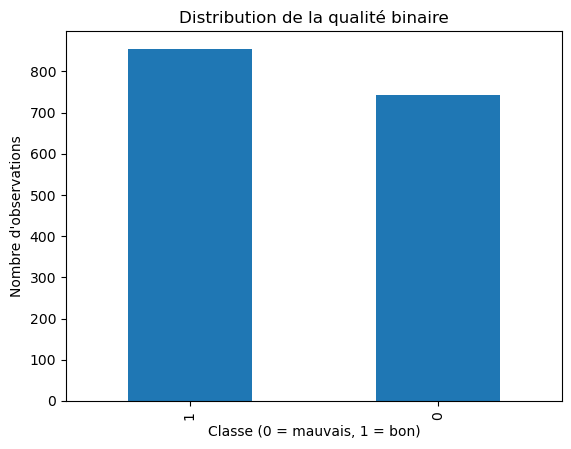

In [20]:
#Regroupement des classes
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df[['quality', 'quality_binary']].head(10)
df['quality_binary'].value_counts()

df['quality_binary'].value_counts().plot(kind='bar')
plt.title("Distribution de la qualité binaire")
plt.xlabel("Classe (0 = mauvais, 1 = bon)")
plt.ylabel("Nombre d'observations")
plt.show()

In [ ]:
Classe 1 (bon vin) : ~850 observations
Classe 0 (mauvais / moyen vin) : ~750 observations

La reformulation du problème en classification binaire permet d’obtenir une distribution plus équilibrée de la variable cible,
ce qui favorise un apprentissage plus stable et améliore la capacité de généralisation des modèles.

In [21]:
#Séparation des données
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Entraînement du modèles binaire
from sklearn.linear_model import LogisticRegression

#Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_bin = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)
rf_bin.fit(X_train, y_train)

#Évaluation
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf_bin.predict(X_test)
y_proba = rf_bin.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       149
           1       0.82      0.81      0.82       171

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320

ROC AUC: 0.8886534008399073


In [ ]:
Performance globale
Accuracy : 0.80
ROC-AUC : 0.889

Precision : 0.79
Recall : 0.79
Le modèle identifie correctement ~79 % des vins à rejeter

CONCLUSION
La reformulation du problème en classification binaire a permis d’améliorer significativement les performances du modèle.
Le Random Forest optimisé atteint une accuracy de 80 % et un ROC-AUC de 0.89, indiquant une excellente capacité de discrimination entre les vins
de qualité acceptable et ceux de moindre qualité. Ce modèle est stable, équilibré et directement exploitable dans un contexte décisionnel.